In [1]:
%load_ext autoreload
%autoreload 2



In [40]:



from PIL import Image, ImageChops, ImageFilter
import numpy as np

import os
import scipy as sp

from src import Background, gkern, bbox_iou
from random import shuffle
import time

from scipy import ndimage as ndi

from skimage import feature



from src import detect_faces, show_bboxes, get_list_of_files, resize_with_pad, trim



%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as wdg  # Using the ipython notebook widgets

In [41]:
# Loading list of images

backgrounds = os.listdir('Backgrounds/')
shuffle(backgrounds)
# faces = os.listdir('cropped_better/')
faces = os.listdir('neck_cropped_faces/')

num_back = len(backgrounds)
num_faces = len(faces)

In [6]:
# def trim(im, th1=2, th2=10):
#     data = np.array(im.convert('HSV'))
# #     data = np.array(im_[:,:,1])
#     mask = np.logical_or(data[...,1]>th1,data[...,2] <(255-th2))
#     mask = Image.fromarray(255*mask.astype('uint8'))
# #     im.putalpha(mask)
#     return mask
    

In [42]:
np.where(np.array(faces) == 'clinton.jpg')

(array([8]),)

### Start Random tests

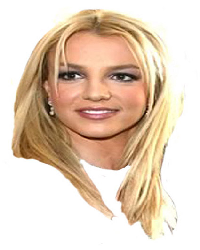

In [88]:
face = Image.open('neck_cropped_faces/'+faces[59])
bg = Image.open('Backgrounds/'+backgrounds[99])
bg = bg.resize((512,512))
face = face.resize((200,250))
face
# print()

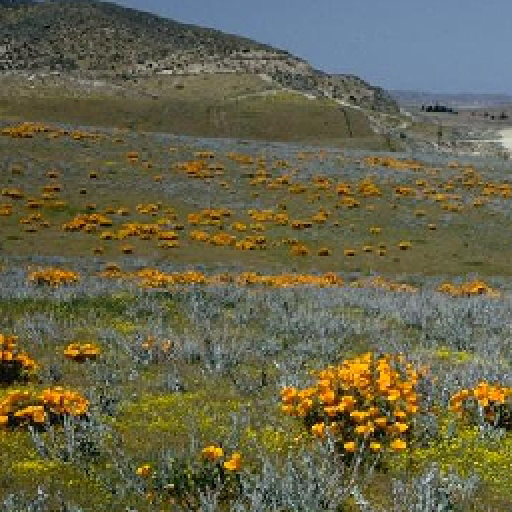

In [89]:
bg


In [90]:

new_face = face.convert('HSV')

In [91]:
plt.imshow(np.array(new_face))

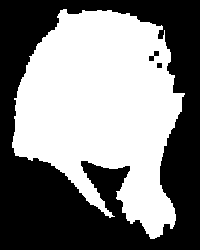

In [92]:
# face = Image.open('neck_cropped_faces/'+faces[61])
mask = trim(face, 1,5)
face.putalpha(mask)
mask

In [93]:

plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
# mask1 = mask.filter(ImageFilter.UnsharpMask(radius=2000))
mask1 = mask.filter(ImageFilter.FIND_EDGES)
plt.imshow(mask1)

In [94]:
plt.subplot(1,2,1)
plt.imshow(face)
plt.subplot(1,2,2)
face1 = face.filter(ImageFilter.FIND_EDGES)
plt.imshow(face1.convert('L'))

/home/suleman/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.
/home/suleman/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


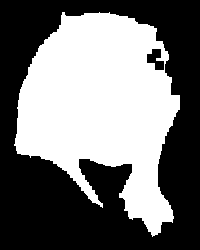

In [95]:
from PIL import ImageChops
mask2 = ImageChops.subtract(mask,mask1)
mask1 = mask2.filter(ImageFilter.FIND_EDGES)
mask2 = ImageChops.subtract(mask2,mask1)
mask2

In [96]:



# new_face = face.filter(ImageFilter.SMOOTH)
# new_face.putalpha(mask)
new_face = face

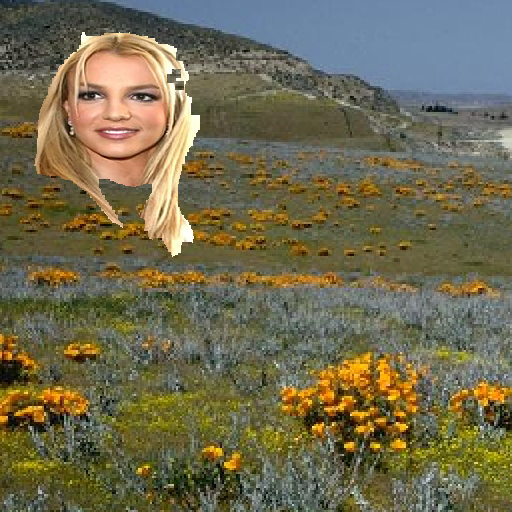

In [97]:
bg = Image.open('Backgrounds/'+backgrounds[99])
bg = bg.resize((512,512))
bg.paste(new_face,box=(20,20), mask = mask2)
bg

<IPython.core.display.Javascript object>


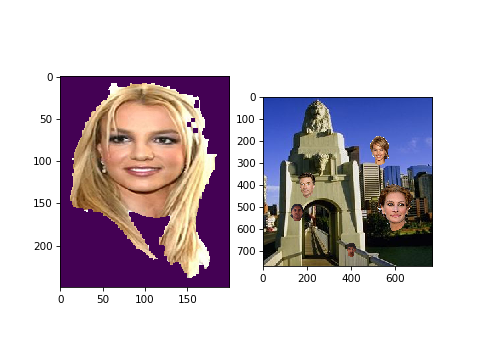

In [87]:

face = Image.open('neck_cropped_faces/'+faces[8])
bg = Image.open('Backgrounds/'+backgrounds[99])
bg = bg.resize((512,512))
face.thumbnail((200,200), 0)
# face = face.resize((200,250))

mask = trim(face, 1,10)
mask1 = mask.filter(ImageFilter.FIND_EDGES)
mask2 = ImageChops.subtract(mask,mask1)
mask1 = mask2.filter(ImageFilter.FIND_EDGES)
mask2 = ImageChops.subtract(mask2,mask1)
# mask2=mask

bg.paste(face,box=(20,20), mask = mask2)




class change:
    def __init__(self):
        self.iter= 0

    def __call__(self,event):
        
        face = Image.open('neck_cropped_faces/'+faces[faces_rand[self.iter]])
        bg = Image.open('Backgrounds/'+backgrounds[99])
        bg = bg.resize((512,512))
        face.thumbnail((200,200), 0)
        

        mask = trim(face, 1,5)


        bg.paste(face,box=(20,20), mask = mask)
        plt.imshow(bg)
        self.iter+=1


fig = plt.figure()

c1 = change()
ka = fig.canvas.mpl_connect('button_press_event', c1)

plt.imshow(bg)

In [34]:
c1('asd')

### End test

In [167]:

data = np.array(face_)
print(data, data.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] (480, 640)


In [168]:
mask = data < 250
print(mask,mask.shape)
# face= face.convert('RGB')
# face.putalpha(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] (480, 640)


In [169]:
# mask.astype('uint8')
print(mask.T.shape)
mask_ = Image.fromarray(255*mask.astype('uint8'))
face.putalpha(mask_)

(640, 480)


In [170]:
# np.mean(np.array(face))
ind = np.where(np.array(face)==255)
print([i.shape for i in ind])

[(753224,), (753224,), (753224,)]


In [171]:
# plt.imshow(face)
np.array(face).shape
# face.putalpha(255)
ind = np.where(np.array(face)==np.array([255,255,255,0]))
print([i.shape for i in ind])

x_y = np.vstack([ind[0],ind[1]])
print(x_y)



[(903768,), (903768,), (903768,)]
[[  0   0   0 ... 479 479 479]
 [  0   0   0 ... 639 639 639]]


In [172]:
alpha = np.ones(face.size)*255
alpha[x_y] = 0

# alpha = np.tile(alpha,[3,1,1])

In [173]:

# alpha = np.moveaxis(alpha,0,-1)
# alpha = np.moveaxis(alpha,[0,1,2],[1,0,2])
print(alpha.shape)

(640, 480)


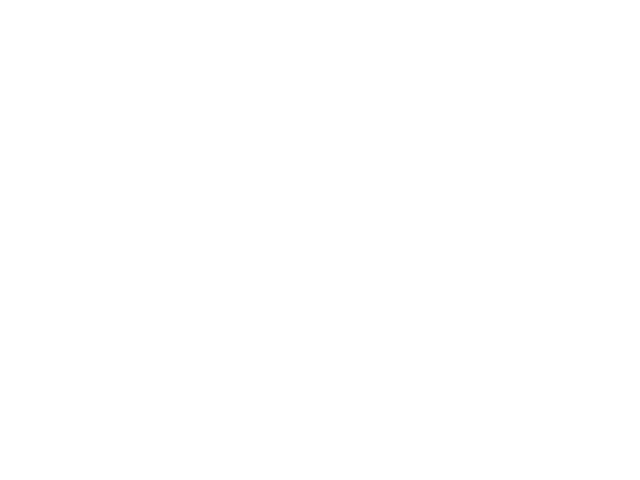

In [174]:
mask = Image.fromarray(alpha.T.astype('uint8'))
face.putalpha(mask)
face


0


<IPython.core.display.Javascript object>


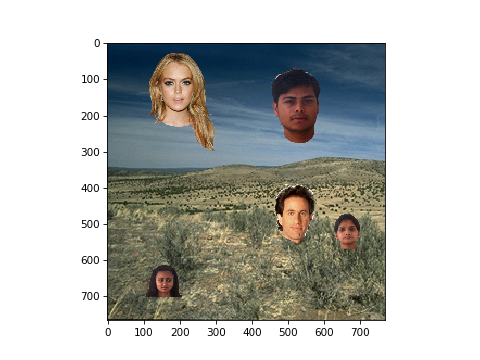

In [156]:
back = backgrounds[np.random.randint(0,len(backgrounds))]
test_bg = Background('Backgrounds/'+back)
test_bg.overlap_threshold  = 0
test_bg.std_step = -0.6
tweaker = 0.05
weights = (tweaker*2,tweaker*2.5)
print(test_bg.overlap_threshold)
no_faces = 5
faces_rand = np.random.choice(num_faces, size=(no_faces), replace=False)
# faces_rand = [0]

for face in faces_rand:
#     print(face)
#     test_bg.place_face('cropped/' + faces[face], blur=False, kernal_weights = weights)
    test_bg.place_face('neck_cropped_faces/' + faces[face], blur=False, kernal_weights = weights)

test_bg.show()

In [135]:
faces_rand

array([11, 77, 77, 23, 40])

[ 54  51  50  51  53  57  60  63  69  77  86  94 101 107 112 115 117] [ 90  97 104 112 118 125 131 137 140 141 139 134 129 122 114 106  97]
dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])


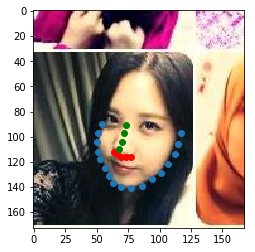

In [116]:
if face_landmarks_list:
    chin = np.array(face_landmarks_list[0]['chin'])
    nose_tip = np.array(face_landmarks_list[0]['nose_tip'])
    nose_bridge = np.array(face_landmarks_list[0]['nose_bridge'])
    print(chin[:,0], chin[:,1])
    print(face_landmarks_list[0].keys())
    plt.imshow(image)
    plt.scatter(chin[:,0], chin[:,1])
    plt.scatter(nose_tip[:,0], nose_tip[:,1], c='r')
    plt.scatter(nose_bridge[:,0], nose_bridge[:,1], c='g')
else:
    plt.imshow(image)

In [76]:
for i in range(5):
    print(test_bg.face_boxes[i].xmin, test_bg.face_boxes[i].ymin)
    
print(bbox_iou(test_bg.face_boxes[0], test_bg.face_boxes[2]))

85 200
100 9
29 55
86 140
196 195
[0.]


In [ ]:
count = 0

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('neck_cropped_faces/'+faces[face])   
#         bg.show()
    bg.save('without_body_data/')
    count = count+1
#     print(count)
bg.show()

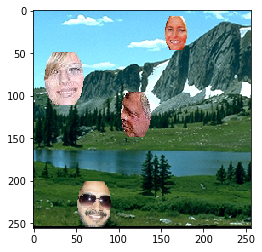

In [51]:
count = 0

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('cropped/'+faces[face])   
        bg.show()
    bg.save('output/')
    count = count+1
#     print(count)


/home/elisa_catherine3/Documents/floating_head_generation/src/my_utils.py:148: RuntimeWarning: invalid value encountered in greater
  mask[mask>255] = 255


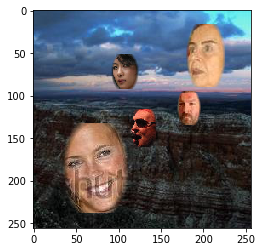

In [28]:
count = 0
tweaker = 1
weights = (tweaker*2,tweaker*2.5)

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('cropped/'+faces[face] , blur=True, kernal_weights = weights)   
        bg.show()
    bg.save('output_blurred/')
    count = count+1
#     print(count)


In [21]:
import numpy as np


def gkern(x=5, y=5, sig_x=1., sig_y=1., mu_x = 2, mu_y = 2):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.arange(-x // 2 + 1., x // 2 + 1.)
    ay = np.arange(-y // 2 + 1., y // 2 + 1.)
    xx, yy = np.meshgrid(ax, ay)
    print(xx)
    kernel = np.exp(-0.5 * (np.square(xx - mu_x) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

[[-49. -48. -47. ...  48.  49.  50.]
 [-49. -48. -47. ...  48.  49.  50.]
 [-49. -48. -47. ...  48.  49.  50.]
 ...
 [-49. -48. -47. ...  48.  49.  50.]
 [-49. -48. -47. ...  48.  49.  50.]
 [-49. -48. -47. ...  48.  49.  50.]]


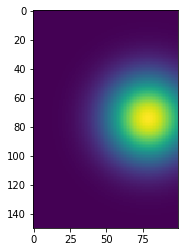

In [23]:
a = gkern(x = 100, y = 150, sig = 20, mu_x = 30)
plt.imshow(a)

In [315]:
def gkern(kernlen_x=21,kernlen_y=21, nsig_x=3, nsig_y=4, mu_x=2,mu_y=-4):
    """Returns a 2D Gaussian kernel array."""

    interval_x = (2*nsig_x+1.)/(kernlen_x)
    interval_y = (2*nsig_y+1.)/(kernlen_y)
    x = np.linspace(-nsig_x-interval_x/2., nsig_x+interval_x/2., kernlen_x+1)
    y = np.linspace(-nsig_y-interval_y/2., nsig_y+interval_y/2., kernlen_y+1)
    kern1d = np.diff(st.norm.cdf(x-(2*mu_x )/kernlen_x))
    kern2d = np.diff(st.norm.cdf(y-(2*mu_y )/kernlen_y))
    kernel_raw = np.sqrt(np.outer(kern1d, kern2d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel


def get_kern(kernlen_x, kernlen_y, sig_x1, sig_y1, sig_x2, sig_y2, mu_x1, mu_y1, mu_x2, mu_y2):
    return gkern(kernlen_x, kernlen_y, sig_x1, sig_y1, mu_x1, mu_y1) , gkern(kernlen_x, kernlen_y,sig_x2, sig_y2,mu_x2, mu_y2)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[0.00000000e+00 1.97664368e-01 1.97664368e-01 ... 7.67536429e+02
 7.67760415e+02 7.68000000e+02]


/home/elisa_catherine3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: All-NaN slice encountered
/home/elisa_catherine3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: All-NaN slice encountered


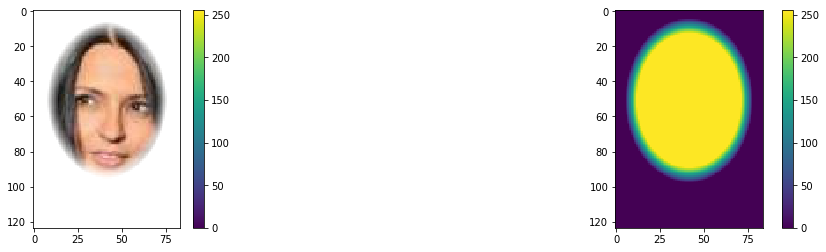

In [360]:
test_face = Image.open('cropped_better/' + faces[15])

data = np.array(test_face.getdata())
blank_img = Image.fromarray(np.ones(test_face.size[::-1] + tuple([3]), dtype = np.uint8)*255)

kern1, kern2 = get_kern(test_face.size[1],test_face.size[0],1.15,1, 1.5,1, -test_face.size[1]*0.1, 0, test_face.size[1]*0.35, 0)


kern1 = kern1/np.max(kern1)
th_1 = (np.mean(kern1) + 0.05*np.std(kern1)) 
kern1[kern1 < th_1] = np.nan
kern1 = np.log(kern1)
kern1 -= np.nanmin(kern1)
kern1 /= np.nanmax(kern1)
kern1 *=768
kern1 = np.nan_to_num(kern1)

kern2 = nkern(test_face.size[1],test_face.size[0], 4, 10, 4*test_face.size[1],0)
kern2 /= np.nanmax(kern2)
kern2 = 1-kern2

th_2 = (np.mean(kern1) + 0.05*np.std(kern2)) 
kern2[kern2 < th_1] = np.nan

kern2 = np.log(kern2+1e-12)
print(kern2)
kern2 -= np.nanmin(kern2)
kern2 /= np.nanmax(kern2)
kern2 *= 255
kern2 = np.nan_to_num(kern2)


# kern2 = kern2/np.max(kern2)
# th_2 = (np.mean(kern2) + 0.9*np.std(kern2)) 
# kern2[kern2 < th_2] = np.nan
# kern2 = np.log(kern2)
# kern2 -= np.nanmin(kern2)
# kern2 /= np.nanmax(kern2)
# kern2 *=768
# kern2 = np.nan_to_num(kern2)


kern = kern1 + kern2
# kern =  kern2
# kern =  kern1
print ((np.unique(kern)))
kern[kern>255] = 255

x_img = Image.fromarray(np.uint8(kern))

x_img = x_img.filter(ImageFilter.MinFilter(5))


blank_img.paste(test_face, (0,0), x_img)


plt.subplot(1,3,1)
# plt.imshow(test_face)
plt.imshow(blank_img)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(kern)
plt.colorbar()


plt.subplots_adjust(left = 28, right = 30)

(98, 144)
(14112, 3)
0.9703333307583434
-0.030076390693157786


/home/elisa_catherine3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater_equal


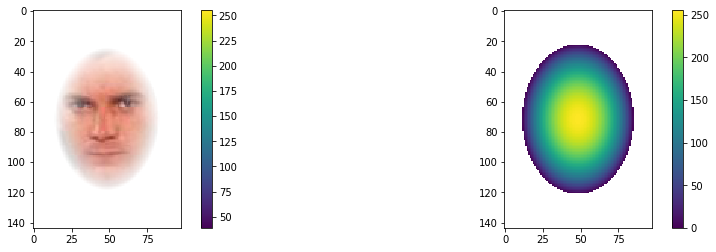

In [30]:
tweaker = 0.25

test_face = Image.open('cropped_better/' + faces[51])

x = gkern(test_face.size[1],test_face.size[0],2.0*tweaker,1.8*tweaker);

data = np.array(test_face.getdata())
blank_img = Image.fromarray(np.ones(test_face.size[::-1] + tuple([3]), dtype = np.uint8)*255)

print(test_face.size)
print(data.shape)


x = x/np.max(x)
th = (np.mean(x) + 0.35*np.std(x)) 
print(th)
x[x < th] = np.nan


# data[...,3] = x

# x_ = np.exp(x)
x_ = np.log(x)
print(np.nanmin(x_))
x_ = x_ - np.nanmin(x_)

# x_[x_ < (np.log(th)-np.min(x_))] = 0
# x_ = 1.3**x_
x_ = x_/np.nanmax(x_)
x_ = x_*255

x[x >= th] = 255
# x = x*255

x_img = Image.fromarray(np.uint8(x_))

x_img = x_img.filter(ImageFilter.MinFilter(5))

blank_img.paste(test_face, (0,0), x_img)


plt.subplot(1,2,1)
plt.imshow(blank_img)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(x_)
plt.colorbar()

plt.subplots_adjust(left = 28, right = 30)

In [212]:
def nkern(kernlen_x=21,kernlen_y=21, nsig_x=3, nsig_y=4, mu_x=2,mu_y=-4):
    """Returns a 2D Gaussian kernel array."""

    interval_x = (2*nsig_x+1.)/(kernlen_x)
    interval_y = (2*nsig_y+1.)/(kernlen_y)
    x = np.linspace(-nsig_x-interval_x/2., nsig_x+interval_x/2., kernlen_x+1)
    y = np.linspace(-nsig_y-interval_y/2., nsig_y+interval_y/2., kernlen_y+1)
    kern1d = 1- np.diff(st.norm.cdf(x-(2*mu_x )/kernlen_x))
    kern2d = 1- np.diff(st.norm.cdf(y-(2*mu_y )/kernlen_y))
    kernel_raw = np.sqrt(np.outer(kern1d, kern2d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

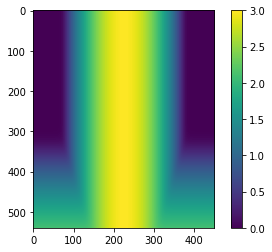

In [349]:
a = nkern(540,450, 4,10,2000,0)
g = gkern(540,450, 2,2)
g = g/np.nanmax(g)

# g[g<0.2] =0
a = a/np.nanmax(a)
a = 1-a
# print(a)
a = np.log(a+1e-12)
a = a - np.nanmin(a)
a = a/np.nanmax(a)
a = 3*a #+ 2*g



plt.imshow(a, vmax = 3)

plt.colorbar()

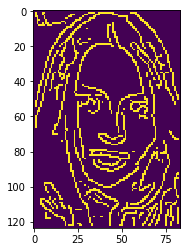

In [313]:

edges = feature.canny(np.asarray(test_face)[:,:,0], sigma =1)
plt.imshow(edges)

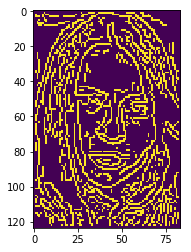